<a href="https://colab.research.google.com/github/Viktor-Lazar-HU/phd_general/blob/main/GoogleColab/Unsupervised/PCA_SPS/simple_sps_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import numpy as np

# --- Parameters ---
d = 5         # Data dimension
p = 2         # Number of principal components
n = 100       # Number of samples
m = 50        # Number of SPS perturbations
q = 5         # SPS hyperparameter (can be set to int((1-P)*m) for confidence level P)

# --- 1. Generate Covariance and Data ---
A = np.random.randn(d, d)
C = A.T @ A  # Covariance matrix
X = np.random.multivariate_normal(mean=np.zeros(d), cov=C, size=n).T  # X: d x n

# --- 2. True Population Basis U* ---
eigvals, eigvecs = np.linalg.eigh(C)
idx = np.argsort(eigvals)[::-1]
U_star = eigvecs[:, idx[:p]]  # d x p

# --- 3. Empirical Basis U_hat (PCA on X) ---
S = np.cov(X)
eigvals_X, eigvecs_X = np.linalg.eigh(S)
idx_X = np.argsort(eigvals_X)[::-1]
U_hat = eigvecs_X[:, idx_X[:p]]  # d x p

# --- 4. SPS Test Statistic Functions ---
def S0(U):
    # S0(U) = (1/n) * || (X - U @ U.T @ X) @ X.T @ U ||_F^2
    X_proj = U @ U.T @ X
    grad = (X - X_proj) @ X.T @ U
    frob_sq = np.linalg.norm(grad, 'fro')**2
    return frob_sq / n

def Si(U, Pi):
    # Si(U) = (1/n) * || (X - U @ U.T @ X) @ Pi @ X.T @ U ||_F^2
    X_proj = U @ U.T @ X
    grad = (X - X_proj) @ Pi @ X.T @ U
    frob_sq = np.linalg.norm(grad, 'fro')**2
    return frob_sq / n

# --- 5. Generate Perturbation Matrices ---
perturbations = [np.diag(np.random.choice([-1, 1], size=n)) for _ in range(m-1)]

# --- 6. SPS Rank Ratio and Confidence Region ---
def R(U):
    s0 = S0(U)
    si_vals = [Si(U, Pi) for Pi in perturbations]
    count = sum([int(si < s0) for si in si_vals])
    return (count + 1) / m

def in_confidence_region(U):
    return R(U) <= (1 - q / m)

# --- Generate 3 test orthonormal bases by perturbing A ---
def make_U_test(A, noise_scale):
    A_noisy = A + noise_scale * np.random.randn(*A.shape)
    C_noisy = A_noisy.T @ A_noisy
    eigvals, eigvecs = np.linalg.eigh(C_noisy)
    idx = np.argsort(eigvals)[::-1]
    return eigvecs[:, idx[:p]]

U_test_close = make_U_test(A, noise_scale=0.1)    # Close to U_star
U_test_medium = make_U_test(A, noise_scale=0.5)   # Medium distance
U_test_far = make_U_test(A, noise_scale=2.0)      # Far away

# --- Example Usage ---
print("True basis U*:\n", U_star)
print("Empirical basis U_hat:\n", U_hat)
print("S0(U_hat):", S0(U_hat))
print("R(U_hat):", R(U_hat))
print("In confidence region empirical:", in_confidence_region(U_hat))
print("In confidence region correct:", in_confidence_region(U_star))

# You can now optimize over U (orthonormal d x p) and check which U are in the confidence region.

print("Distance to U_star (close):", np.linalg.norm(U_star - U_test_close, 'fro'))
print("Distance to U_star (medium):", np.linalg.norm(U_star - U_test_medium, 'fro'))
print("Distance to U_star (far):", np.linalg.norm(U_star - U_test_far, 'fro'))

print("R(U_test_close):", R(U_test_close), "In region:", in_confidence_region(U_test_close))
print("R(U_test_medium):", R(U_test_medium), "In region:", in_confidence_region(U_test_medium))
print("R(U_test_far):", R(U_test_far), "In region:", in_confidence_region(U_test_far))


True basis U*:
 [[-0.42066944 -0.80291827]
 [-0.03507063 -0.38386048]
 [-0.27095083  0.13423123]
 [-0.71357968  0.43576566]
 [-0.48907766  0.00797791]]
Empirical basis U_hat:
 [[-0.59231781 -0.70282931]
 [-0.09545126 -0.34686196]
 [-0.24473807  0.11317374]
 [-0.59995594  0.59482538]
 [-0.46925985  0.13817458]]
S0(U_hat): 0.016230126202582587
R(U_hat): 0.02
In confidence region empirical: True
In confidence region correct: True
Distance to U_star (close): 0.09020791661014861
Distance to U_star (medium): 0.6620473971404158
Distance to U_star (far): 1.2972566073399312
R(U_test_close): 0.42 In region: True
R(U_test_medium): 1.0 In region: False
R(U_test_far): 1.0 In region: False


<>:178: SyntaxWarning: invalid escape sequence '\m'
<>:178: SyntaxWarning: invalid escape sequence '\m'
C:\Users\User\AppData\Local\Temp\ipykernel_19560\17595739.py:178: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(thetas, rejection_rates, marker='o', linestyle='', color='#1f77b4', label='Rejection Rate for Test Basis $\mathbf{U}_{\mathrm{test}}$')


Running Monte Carlo simulation (100 trials per noise level)...
Theta 0.00: Rejected 0.00
Theta 0.04: Rejected 0.00
Theta 0.08: Rejected 0.00
Theta 0.12: Rejected 0.00
Theta 0.17: Rejected 0.00
Theta 0.21: Rejected 0.00
Theta 0.25: Rejected 0.00
Theta 0.29: Rejected 0.00
Theta 0.33: Rejected 0.00
Theta 0.38: Rejected 0.00
Theta 0.42: Rejected 0.00
Theta 0.46: Rejected 0.00
Theta 0.50: Rejected 0.00
Theta 0.54: Rejected 0.00
Theta 0.58: Rejected 0.00
Theta 0.62: Rejected 0.00
Theta 0.67: Rejected 0.00
Theta 0.71: Rejected 0.00
Theta 0.75: Rejected 0.00
Theta 0.79: Rejected 0.00
Theta 0.83: Rejected 0.00
Theta 0.88: Rejected 0.00
Theta 0.92: Rejected 0.00
Theta 0.96: Rejected 0.00
Theta 1.00: Rejected 0.00


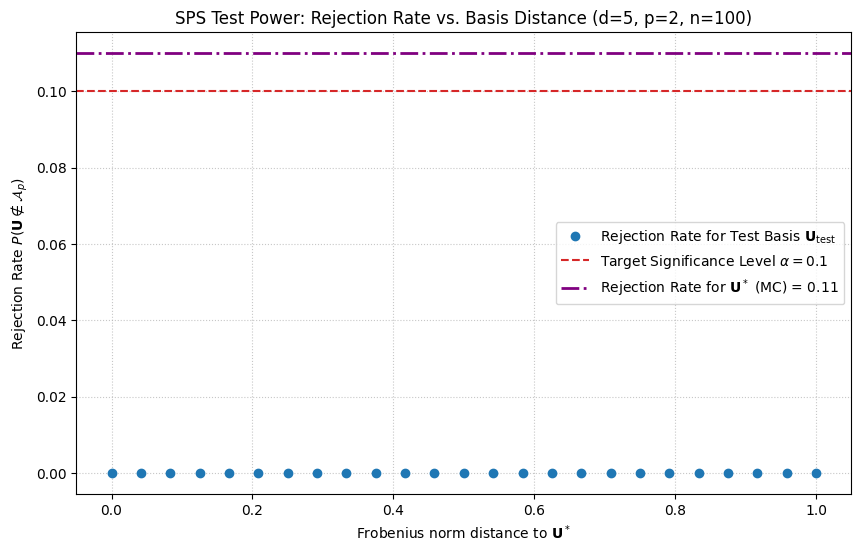


Visualization complete. The plot shows how quickly the SPS test rejects test bases as they move further from the true population solution.
[0.         0.04166667 0.08333333 0.125      0.16666667 0.20833333
 0.25       0.29166667 0.33333333 0.375      0.41666667 0.45833333
 0.5        0.54166667 0.58333333 0.625      0.66666667 0.70833333
 0.75       0.79166667 0.83333333 0.875      0.91666667 0.95833333
 1.        ]


In [18]:
import numpy as np
from scipy.linalg import qr, logm, expm
import matplotlib.pyplot as plt

# --- Global Parameters ---
d = 5         # Data dimension
p = 2         # Number of principal components
n = 100       # Number of samples
m = 50        # Number of SPS perturbations
q = 5         # SPS hyperparameter (90% confidence, since 1 - 5/50 = 0.9)
scal = 25      # Number of noise levels to test
N_SIMULATIONS = 100 # Number of independent Monte Carlo runs per noise level

# Target Significance Level (alpha)
ALPHA = q / m

# --- Core SPS Functions (Copied from previous file for self-contained execution) ---

def S_statistic(U, X, P=None):
    """Calculates the squared Frobenius norm of the normalized gradient."""
    
    # Calculate Residual: R = X - U @ U.T @ X
    X_proj = U @ U.T @ X
    R = X - X_proj
    
    # Gradient component: G = R @ X.T @ U
    if P is None:
        grad = R @ X.T @ U
    else:
        # P is a diagonal matrix (n x n)
        grad = R @ P @ X.T @ U
        
    frob_sq = np.linalg.norm(grad, 'fro')**2
    return frob_sq / n

def R(U, X, perturbations):
    """
    Calculates the rank ratio R(U) (rank from the smallest value up).
    R(U) = (Number of Si < S0) + 1 / m
    """
    s0 = S_statistic(U, X)
    si_vals = [S_statistic(U, X, Pi) for Pi in perturbations]
    
    # Count how many Si are strictly LARGER than S0
    count = sum([int(si > s0) for si in si_vals])
    
    return (count + 1) / m

def in_confidence_region(U, X, perturbations):
    """
    Checks if U is in the confidence region based on the criterion: R(U) <= 1 - q/m.
    """
    rank_ratio = R(U, X, perturbations)
    threshold = (1 - q / m)
    return rank_ratio <= threshold

def make_U_test_rotation(A, theta):
    """
    Generates an orthonormal basis by applying a smooth rotation between identity
    and a random rotation to the original matrix A.
    
    Args:
        A: Original matrix (e.g., covariance or factor matrix)
        theta: interpolation parameter in [0, 1], with 0 = identity, 1 = full random rotation
    
    Returns:
        U_test: rotated orthonormal basis of size d x p
    """
    d, p = A.shape
    
    # Generate random rotation Q_random via QR decomposition
    Q_random, _ = qr(np.random.randn(d, d))
    
    # Compute matrix logarithm (skew-symmetric generator)
    S = logm(Q_random)
    
    # Interpolate rotation via matrix exponential
    Q_theta = expm(theta * S)
    
    # Apply rotation to A
    A_rotated = Q_theta @ A
    
    # Form covariance and take first p eigenvectors
    C_rotated = A_rotated.T @ A_rotated
    eigvals, eigvecs = np.linalg.eigh(C_rotated)
    idx = np.argsort(eigvals)[::-1]
    U_test = eigvecs[:, idx[:p]]
    
    return U_test

def generate_perturbations(m, n):
    """Generates m-1 diagonal perturbation matrices."""
    return [np.diag(np.random.choice([-1, 1], size=n)) for _ in range(m-1)]

# --- Monte Carlo Simulation ---

def run_monte_carlo_simulation(thetas, A):
    """
    Runs a simulation to determine the rejection rate of test bases 
    generated at different noise scales.
    """
    rejection_rates = []
    
    # Generate one set of perturbation matrices for all trials (to save time)
    # Note: In a true SPS application, Pi are regenerated, but for simplicity 
    # and visualization here, we fix the overall set size m.
    perturbations = generate_perturbations(m, n)
    
    print(f"Running Monte Carlo simulation ({N_SIMULATIONS} trials per noise level)...")

    C = A.T @ A
    X = np.random.multivariate_normal(mean=np.zeros(d), cov=C, size=n).T

    for theta in thetas:
        rejected_count = 0
        
        for _ in range(N_SIMULATIONS):
            
            # 3. Generate the test basis U_test (perturbed relative to the true structure A)
            U_test = make_U_test_rotation(A, theta)
            
            # 4. Check acceptance using the current dataset X
            # Note: The test uses the gradient calculated from X.
            is_accepted = in_confidence_region(U_test, X, perturbations)
            
            if not is_accepted:
                rejected_count += 1
        
        rejection_rate = rejected_count / N_SIMULATIONS
        rejection_rates.append(rejection_rate)
        print(f"Theta {theta:.2f}: Rejected {rejection_rate:.2f}")

    return np.array(rejection_rates)

def monte_carlo_U_star(A_true, n, m, N_SIMULATIONS):
    """Monte Carlo rejection rate for the true population basis U_star."""
    C_true = A_true.T @ A_true
    eigvals, eigvecs = np.linalg.eigh(C_true)
    idx = np.argsort(eigvals)[::-1]
    U_star = eigvecs[:, idx[:p]]
    rejection_count = 0
    for _ in range(N_SIMULATIONS):
        X = np.random.multivariate_normal(mean=np.zeros(d), cov=C_true, size=n).T
        perturbations = [np.diag(np.random.choice([-1, 1], size=n)) for _ in range(m-1)]
        is_accepted = in_confidence_region(U_star, X, perturbations)
        if not is_accepted:
            rejection_count += 1
    return rejection_count / N_SIMULATIONS

# --- Main Execution and Plotting ---

if __name__ == "__main__":
    # Fix a true underlying structure (A) for consistency
    np.random.seed(50)
    A_true = np.random.randn(d, d)
    
    # Define the range of noise (perturbation) levels for the test basis
    thetas = np.linspace(0.0, 1.0, scal)

    # Calculate the Frobenius distance (approximate separation metric)
    # We use U_test at each scale vs U_star at scale 0 as a representative distance
    # For plotting: we need a representative distance for the x-axis, not just noise scale.
    # --- 2. True Population Basis U* ---
    C = A_true.T @ A_true
    eigvals, eigvecs = np.linalg.eigh(C)
    idx = np.argsort(eigvals)[::-1]
    U_star = eigvecs[:, idx[:p]]  # d x p

    # Run the simulation
    rejection_rates = run_monte_carlo_simulation(thetas, A_true)

    rejection_rate_U_star = monte_carlo_U_star(A_true, n, m, N_SIMULATIONS)
    
    # Plotting the Results
    plt.figure(figsize=(10, 6))
    
    # 1. Rejection Rate vs. Noise Scale
    plt.plot(thetas, rejection_rates, marker='o', linestyle='', color='#1f77b4', label='Rejection Rate for Test Basis $\mathbf{U}_{\mathrm{test}}$')
    
    # 2. Target Significance Level (Power baseline)
    plt.axhline(y=ALPHA, color='#d62728', linestyle='--', label=f'Target Significance Level $\\alpha = {ALPHA}$')
    
    # 3. The Power of the Test (1 - acceptance rate for U_star)
    # The first point (noise=0) should approximate ALPHA, as U_test=U_star
    # Since U_star is generated from the true C, its rejection rate should be close to ALPHA
    plt.axhline(y=rejection_rate_U_star, color='purple', linestyle='-.', linewidth=2, label=f'Rejection Rate for $\\mathbf{{U}}^*$ (MC) = {rejection_rate_U_star:.2f}')

    
    plt.title(f'SPS Test Power: Rejection Rate vs. Basis Distance (d={d}, p={p}, n={n})')
    plt.xlabel('Frobenius norm distance to $\\mathbf{U}^*$')
    plt.ylabel('Rejection Rate $P(\\mathbf{U} \\notin \\mathcal{A}_p)$')
    plt.grid(True, which='both', linestyle=':', alpha=0.7)
    plt.legend()
    plt.show()
    
    print("\nVisualization complete. The plot shows how quickly the SPS test rejects test bases as they move further from the true population solution.")

    print(thetas)

Generating single confidence region with 50 test points...


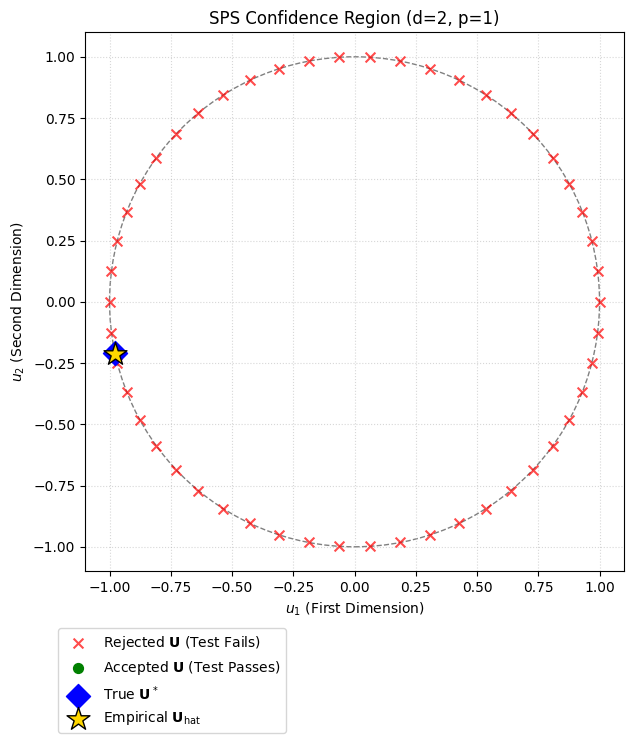


Visualization complete. The plot clearly shows the four categories on the unit circle.


In [173]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt

# --- Visualization Parameters ---
d = 2         # Data dimension (2D)
p = 1         # Number of principal components (1D line)
n = 100       # Number of samples
m = 50        # Number of SPS perturbations
q = 5         # SPS hyperparameter (90% confidence, 1 - 5/50 = 0.9)
ALPHA = q / m
THRESHOLD = 1 - ALPHA

# Requested change: Limit the number of test points for a cleaner chart
num_points_on_circle = 50 

# --- Core SPS Functions ---

def S_statistic(U, X, P=None):
    """Calculates the squared Frobenius norm of the normalized gradient."""
    
    # Ensure U is 2x1 (d x p) for matrix math
    U = U.reshape(d, p)
    
    # Calculate Residual: R = X - U @ U.T @ X
    X_proj = U @ U.T @ X
    R_mat = X - X_proj
    
    # Gradient component: G = R_mat @ X.T @ U
    if P is None:
        grad = R_mat @ X.T @ U
    else:
        # P is a diagonal matrix (n x n)
        grad = R_mat @ P @ X.T @ U
        
    frob_sq = np.linalg.norm(grad, 'fro')**2
    return frob_sq / n

def R_rank_ratio(U, X, perturbations):
    """
    Calculates the rank ratio R(U).
    R(U) = (Number of Si < S0) + 1 / m
    """
    s0 = S_statistic(U, X)
    si_vals = [S_statistic(U, X, Pi) for Pi in perturbations]
    
    # Count how many Si are strictly SMALLER than S0
    count = sum([int(si < s0) for si in si_vals])
    
    return (count + 1) / m

def generate_perturbations(m, n):
    """Generates m-1 diagonal perturbation matrices."""
    return [np.diag(np.random.choice([-1, 1], size=n)) for _ in range(m-1)]

# --- Main Execution and Plotting ---

if __name__ == "__main__":
    np.random.seed(42)
    
    # Create a highly anisotropic (skewed) covariance matrix for clear PCA
    A_true = np.array([[5, 1], [1, 0.5]]) 
    C_true = A_true.T @ A_true
    
    # Generate a fixed set of perturbation matrices once
    perturbations_static = generate_perturbations(m, n)

    # Generate points on the unit circle
    thetas = np.linspace(0, 2 * np.pi, num_points_on_circle, endpoint=False)
    u1_coords = np.cos(thetas)
    u2_coords = np.sin(thetas)
    
    # Setup for a single, focused plot
    fig, ax = plt.subplots(1, 1, figsize=(7, 7))

    print(f"Generating single confidence region with {num_points_on_circle} test points...")

    # --- Generate new data (X) for the single run ---
    X_run = np.random.multivariate_normal(mean=np.zeros(d), cov=C_true, size=n).T
    
    # --- True Population Basis U* (Blue Diamond) ---
    eigvals, eigvecs = linalg.eigh(C_true)
    idx = np.argsort(eigvals)[::-1]
    U_star_run = eigvecs[:, idx[:p]]
    
    # --- Empirical Basis U_hat (Gold Star) ---
    S_run = np.cov(X_run)
    eigvals_X, eigvecs_X = linalg.eigh(S_run)
    idx_X = np.argsort(eigvals_X)[::-1]
    U_hat_run = eigvecs_X[:, idx_X[:p]]

    # --- Evaluate SPS for all points on the unit circle ---
    accepted_u1 = []
    accepted_u2 = []
    rejected_u1 = []
    rejected_u2 = []
    
    for k in range(num_points_on_circle):
        U_test = np.array([[u1_coords[k]], [u2_coords[k]]])
        rank_ratio = R_rank_ratio(U_test, X_run, perturbations_static)
        
        if rank_ratio <= THRESHOLD:
            accepted_u1.append(u1_coords[k])
            accepted_u2.append(u2_coords[k])
        else:
            rejected_u1.append(u1_coords[k])
            rejected_u2.append(u2_coords[k])

    # --- Plotting for current run ---
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)

    # Draw unit circle
    circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--', linewidth=1)
    ax.add_artist(circle)
    
    # Plot Rejected points first (zorder=2, background)
    ax.scatter(rejected_u1, rejected_u2, color='red', s=50, marker='x', 
               label='Rejected $\\mathbf{U}$ (Test Fails)', zorder=2, alpha=0.7)
    
    # Plot Accepted points (zorder=3, foreground)
    ax.scatter(accepted_u1, accepted_u2, color='green', s=50, marker='o', 
               label='Accepted $\\mathbf{U}$ (Test Passes)', zorder=3)
    
    # Plot U_star (True Optimal - Blue Diamond)
    ax.scatter(U_star_run[0, 0], U_star_run[1, 0], color='blue', s=150, marker='D', 
               label='True $\\mathbf{U}^*$', zorder=5)
    
    # Plot U_hat (Empirical Optimal - Gold Star)
    ax.scatter(U_hat_run[0, 0], U_hat_run[1, 0], color='gold', edgecolor='black', s=300, marker='*', 
               label='Empirical $\\mathbf{U}_{\\mathrm{hat}}$', zorder=5)

    ax.set_title(f'SPS Confidence Region (d={d}, p={p})')
    ax.set_xlabel('$u_1$ (First Dimension)')
    ax.set_ylabel('$u_2$ (Second Dimension)')
    ax.grid(True, linestyle=':', alpha=0.5)
    
    # Place legend clearly outside the circle
    ax.legend(loc='lower left', bbox_to_anchor=(-0.05, -0.3), borderaxespad=0.)
    
    plt.show()

    print("\nVisualization complete. The plot clearly shows the four categories on the unit circle.")


Distance ||U_hat - U*|| = 0.0039
Setting axis limits to +/- 0.0197 (Zoom Factor: 5.0)


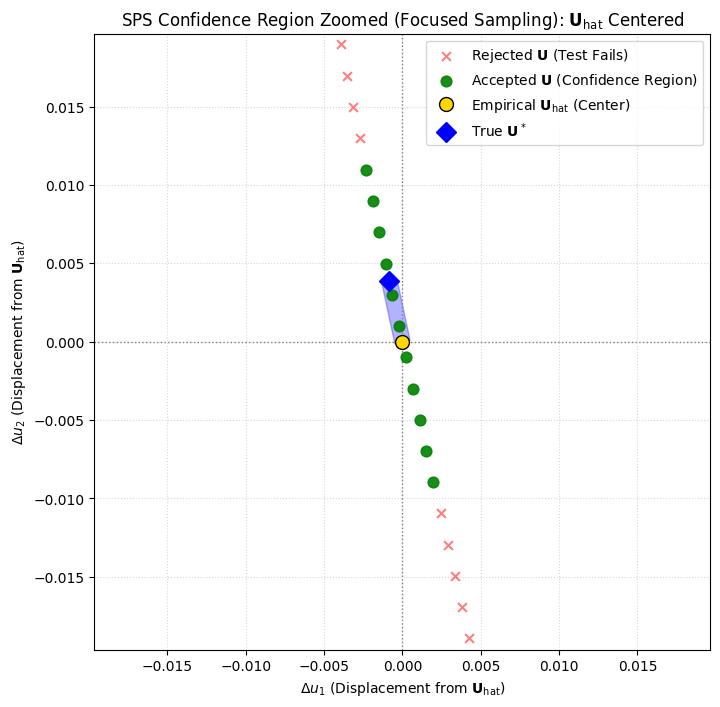


Visualization complete. The test points are now focused around the empirical solution (U_hat) based on the distance to the true solution (U*), providing a dense picture of the confidence region.


In [ ]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt

# --- Visualization Parameters ---
d = 2         # Data dimension (2D)
p = 1         # Number of principal components (1D line)
n = 100       # Number of samples
m = 50        # Number of SPS perturbations
q = 5         # SPS hyperparameter (90% confidence, 1 - 5/50 = 0.9)
THRESHOLD = 1 - (q / m)

# Number of points to test around the circle (focused sampling)
num_points_on_circle = 50 
ZOOM_FACTOR = 5.0 # Factor used for both axis limits and angular sampling range

# --- Core SPS Functions (Copied for Self-Contained File) ---

def S_statistic(U, X, P=None):
    """Calculates the squared Frobenius norm of the normalized gradient."""
    U = U.reshape(d, p)
    
    # Calculate Residual: R_mat = X - U @ U.T @ X
    X_proj = U @ U.T @ X
    R_mat = X - X_proj
    
    # Gradient component: G = R_mat @ P @ X.T @ U
    if P is None:
        grad = R_mat @ X.T @ U
    else:
        grad = R_mat @ P @ X.T @ U
        
    frob_sq = np.linalg.norm(grad, 'fro')**2
    return frob_sq / n

def R_rank_ratio(U, X, perturbations):
    """
    Calculates the rank ratio R(U).
    R(U) = (Number of Si < S0) + 1 / m
    """
    s0 = S_statistic(U, X)
    si_vals = [S_statistic(U, X, Pi) for Pi in perturbations]
    
    # Count how many Si are strictly SMALLER than S0
    count = sum([int(si < s0) for si in si_vals])
    
    return (count + 1) / m

def generate_perturbations(m, n):
    """Generates m-1 diagonal perturbation matrices."""
    return [np.diag(np.random.choice([-1, 1], size=n)) for _ in range(m-1)]

# --- Main Execution and Plotting ---

if __name__ == "__main__":
    np.random.seed(42)
    
    # --- Setup Data and Bases ---
    A_true = np.array([[5, 1], [1, 0.5]]) 
    C_true = A_true.T @ A_true
    perturbations_static = generate_perturbations(m, n)

    # Generate new data (X) for the single run
    X_run = np.random.multivariate_normal(mean=np.zeros(d), cov=C_true, size=n).T
    
    # True Population Basis U*
    eigvals, eigvecs = linalg.eigh(C_true)
    idx = np.argsort(eigvals)[::-1]
    U_star_run = eigvecs[:, idx[:p]]
    
    # Empirical Basis U_hat
    S_run = np.cov(X_run)
    eigvals_X, eigvecs_X = linalg.eigh(S_run)
    idx_X = np.argsort(eigvals_X)[::-1]
    U_hat_run = eigvecs_X[:, idx_X[:p]]
    
    # Flatten U vectors for coordinate math
    u_hat_vec = U_hat_run.flatten()
    u_star_vec = U_star_run.flatten()

    # --- Dynamic Zoom Calculation ---
    distance_U_hat_to_U_star = np.linalg.norm(u_hat_vec - u_star_vec)
    
    # Set axis limit based on distance and zoom factor
    axis_limit = distance_U_hat_to_U_star * ZOOM_FACTOR
    
    print(f"Distance ||U_hat - U*|| = {distance_U_hat_to_U_star:.4f}")
    print(f"Setting axis limits to +/- {axis_limit:.4f} (Zoom Factor: {ZOOM_FACTOR})")

    # --- Evaluate SPS for FOCUSED points on the unit circle ---
    
    # 1. Ensure U_hat is aligned with U_star (PCA basis is unique up to sign)
    if np.dot(u_hat_vec, u_star_vec) < 0:
        u_hat_vec = -u_hat_vec
    
    # 2. Calculate U_hat angle
    theta_hat = np.arctan2(u_hat_vec[1], u_hat_vec[0])
    
    # 3. Calculate the angular distance between U_hat and U*
    # Use arccos(dot product) for the angle between unit vectors
    angular_dist_hat_star = np.arccos(np.dot(u_hat_vec, u_star_vec))
    
    # 4. Define sampling arc range based on angular distance and ZOOM_FACTOR
    angular_sampling_range = angular_dist_hat_star * ZOOM_FACTOR
    
    # Set a minimum sampling range to avoid issues when U_hat is very close to U*
    if angular_sampling_range < 0.1: # Min 0.1 radians (approx 5.7 degrees)
        angular_sampling_range = 0.1
    
    start_theta = theta_hat - angular_sampling_range / 2
    end_theta = theta_hat + angular_sampling_range / 2

    # 5. Generate focused array of test angles
    thetas_focused = np.linspace(start_theta, end_theta, num_points_on_circle)
    
    accepted_diffs = [] # [(du1, du2), ...]
    rejected_diffs = [] 
    
    for theta in thetas_focused: # Use the focused theta array
        U_test = np.array([[np.cos(theta)], [np.sin(theta)]])
        rank_ratio = R_rank_ratio(U_test, X_run, perturbations_static)
        
        u_test_vec = U_test.flatten()
        
        # Calculate the displacement vector relative to U_hat (which may have been sign-flipped)
        # Re-calculate U_hat_aligned using the (potentially flipped) u_hat_vec for correct center
        u_hat_aligned = u_hat_vec 
        
        diff_vector = u_test_vec - u_hat_aligned
        
        if rank_ratio <= THRESHOLD:
            accepted_diffs.append(diff_vector)
        else:
            rejected_diffs.append(diff_vector)
            
    accepted_diffs = np.array(accepted_diffs)
    rejected_diffs = np.array(rejected_diffs)
    
    # Displacement of U* from the center U_hat_aligned
    U_star_diff = u_star_vec - u_hat_aligned

    # --- Plotting the Zoomed Map ---
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    # Plot Rejected points (Fails the SPS test)
    if rejected_diffs.size > 0:
        ax.scatter(rejected_diffs[:, 0], rejected_diffs[:, 1], 
                   color='red', s=40, marker='x', alpha=0.5, 
                   label='Rejected $\\mathbf{U}$ (Test Fails)', zorder=2)

    # Plot Accepted points (Passes the SPS test - the confidence region)
    if accepted_diffs.size > 0:
        ax.scatter(accepted_diffs[:, 0], accepted_diffs[:, 1], 
                   color='green', s=60, marker='o', alpha=0.9, 
                   label='Accepted $\\mathbf{U}$ (Confidence Region)', zorder=3)
    
    # Plot the center (U_hat)
    ax.axhline(0, color='gray', linestyle=':', linewidth=1)
    ax.axvline(0, color='gray', linestyle=':', linewidth=1)
    # FIX: Changed 'edgecolor' to 'markeredgecolor' (or 'mec') to fix the AttributeError
    ax.plot(0, 0, 'o', color='gold', markeredgecolor='black', markersize=10, 
            label='Empirical $\\mathbf{U}_{\\mathrm{hat}}$ (Center)', zorder=5)

    # Plot the True Basis (U*)
    ax.plot([U_star_diff[0]], [U_star_diff[1]], 'D', color='blue', markersize=10, 
            label='True $\\mathbf{U}^*$', zorder=5)

    # FIX: Use raw string for robust LaTeX rendering in Matplotlib title
    ax.set_title(r'SPS Confidence Region Zoomed (Focused Sampling): $\mathbf{U}_{\mathrm{hat}}$ Centered')

    ax.set_xlabel('$\\Delta u_1$ (Displacement from $\\mathbf{U}_{\\mathrm{hat}}$)')
    ax.set_ylabel('$\\Delta u_2$ (Displacement from $\\mathbf{U}_{\\mathrm{hat}}$)')
    
    # Apply dynamic axis limits
    ax.set_xlim(-axis_limit, axis_limit)
    ax.set_ylim(-axis_limit, axis_limit)
    ax.set_aspect('equal', adjustable='box')
    
    ax.grid(True, linestyle=':', alpha=0.5)
    ax.legend(loc='upper right')
    plt.show()

    print("\nVisualization complete. The test points are now focused around the empirical solution (U_hat) based on the distance to the true solution (U*), providing a dense picture of the confidence region.")
